In [1]:
# !pip install wandb

In [2]:
import wandb

In [3]:
wandb.login()

wandb: Currently logged in as: abhijeet001. Use `wandb login --relogin` to force relogin


True

In [4]:
# my_project = CS6910_ASSIGNMENT_01

In [5]:
# cs6910_assignment_01

In [6]:
############################################################################################################################
# %%writefile activation.py
# ACTIVATION_FUNCTION

import numpy as np
import math

def relu(pre_activation_vector):
    """
    Calculate the ReLU activation of a pre-activation vector.

    Args:
    pre_activation_vector (numpy.ndarray): The input vector.

    Returns:
    numpy.ndarray: The ReLU activated vector.
    """
    post_act = np.copy(pre_activation_vector)
    post_act[post_act < 0] = 0
    return post_act

def sigmoid(pre_activation_vector):
    """
    Calculate the sigmoid of a pre-activation layer.

    Args:
    pre_activation_vector (numpy.ndarray): The input vector.

    Returns:
    numpy.ndarray: The activated vector.
    """
    activated_vector = np.empty_like(pre_activation_vector)
    for i, elem in np.ndenumerate(pre_activation_vector):
        activated_vector[i] = sigmoid_element_wise(elem)
    return activated_vector

def softmax(pre_activation_vector):
    """
    Calculate the softmax of a pre-activation vector.

    Args:
    pre_activation_vector (numpy.ndarray): The input vector.

    Returns:
    numpy.ndarray: The softmax output.
    """
    post_act = np.copy(pre_activation_vector)
    max_exponent = np.max(post_act)
    post_act = np.exp(post_act - max_exponent)
    post_act = post_act / np.sum(post_act)
    return post_act

def sigmoid_element_wise(vector_component):
    """
    Calculate the sigmoid function value of a component of a vector.

    Args:
    vector_component (float): The input value.

    Returns:
    float: The sigmoid value of the input.
    """
    if vector_component >= 0:
        return 1 / (1 + math.exp(-vector_component))
    else:
        return math.exp(vector_component) / (math.exp(vector_component) + 1)



def activation_function(pre_activation_vector, context):
    """
    Apply the specified activation function to the pre-activation vector.

    Args:
    pre_activation_vector (numpy.ndarray): The input vector.
    context (str): The context specifying the activation function ('softmax', 'sigmoid', 'tanh', 'relu').

    Returns:
    numpy.ndarray: The activated vector.
    """
    if context == 'softmax':
        return softmax(pre_activation_vector)
    elif context == 'sigmoid':
        return sigmoid(pre_activation_vector)
    elif context == 'tanh':
        return np.copy(np.tanh(pre_activation_vector))
    elif context == 'relu':
        return relu(pre_activation_vector)
    else:
        return None


In [7]:
############################################################################################################################
# %%writefile loss.py
# LOSS_TYPE

"""This file contains various methods for calculating loss functions."""
import numpy as np
def squared_error(label, softmax_output):
    """
    Calculate the squared error loss.

    Args:
    label (int): The true label index.
    softmax_output (numpy.ndarray): The softmax output vector.

    Returns:
    float: The squared error loss.
    """
    true_vector = np.zeros_like(softmax_output)
    true_vector[label] = 1
    size = float(len(softmax_output))
    return np.array([(np.linalg.norm(true_vector - softmax_output) ** 2) / size]).reshape((1, 1))

def cross_entropy(label, softmax_output):
    """
    Calculate the cross-entropy loss.

    Args:
    label (int): The true label index.
    softmax_output (numpy.ndarray): The softmax output vector.

    Returns:
    float: The cross-entropy loss.
    """
    if softmax_output[label] < 1e-8:
        return -np.log(1e-8)
    return -np.log(softmax_output[label])


In [8]:
# %%writefile grad.py
# GRADIENT

import numpy as np

def squared_error_grad(y_hat, label):
    """
    Calculate the gradient of squared error loss with respect to the output activations.

    Args:
    y_hat (numpy.ndarray): The predicted output vector.
    label (int): The true label index.

    Returns:
    numpy.ndarray: The gradient of the loss with respect to the output activations.
    """
    temp = np.copy(y_hat)
    temp[label] -= 1
    temp = 2 * temp / len(y_hat)
    norm = np.linalg.norm(temp)
    if norm > 100.0:
        return temp * 100.0 / norm
    else:
        return temp
    
def cross_entropy_grad(y_hat, label):
    """
    Calculate the gradient of cross-entropy loss with respect to the output activations.

    Args:
    y_hat (numpy.ndarray): The predicted output vector.
    label (int): The true label index.

    Returns:
    numpy.ndarray: The gradient of the loss with respect to the output activations.
    """
    temp = np.zeros_like(y_hat)
    if y_hat[label] < 1e-8:
        y_hat[label] = 1e-8
    temp[label] = -1 / (y_hat[label])
    norm = np.linalg.norm(temp)
    if norm > 100.0:
        return temp * 100.0 / norm
    else:
        return temp


def output_grad(y_hat, label, loss_type):
    """
    Calculate the gradient of the specified loss function with respect to the output activations.

    Args:
    y_hat (numpy.ndarray): The predicted output vector.
    label (int): The true label index.
    loss_type (str): The type of loss function ('cross_entropy' or 'squared_error').

    Returns:
    numpy.ndarray: The gradient of the loss with respect to the output activations.
    """
    if loss_type == 'cross_entropy':
        return cross_entropy_grad(y_hat, label)
    elif loss_type == 'squared_error':
        return squared_error_grad(y_hat, label)

def last_grad(y_hat, label):
    """
    Calculate the gradient of the last layer's activations with respect to the output activations.

    Args:
    y_hat (numpy.ndarray): The predicted output vector.
    label (int): The true label index.

    Returns:
    numpy.ndarray: The gradient of the last layer's activations with respect to the output activations.
    """
    temp = np.copy(y_hat)
    temp[label] = temp[label] - 1
    norm = np.linalg.norm(temp)
    if norm > 100.0:
        return temp * 100.0 / norm
    else:
        return temp

def tanh_grad(post_activation):
    """
    Calculate the gradient of the hyperbolic tangent activation function.

    Args:
    post_activation (numpy.ndarray): The post-activation vector.

    Returns:
    numpy.ndarray: The gradient of the hyperbolic tangent activation function.
    """
    return 1 - np.power(post_activation, 2)

def relu_grad(pre_activation_vector):
    """
    Calculate the gradient of the ReLU activation function.

    Args:
    pre_activation_vector (numpy.ndarray): The pre-activation vector.

    Returns:
    numpy.ndarray: The gradient of the ReLU activation function.
    """
    grad = np.copy(pre_activation_vector)
    grad[grad >= 0] = 1
    grad[grad < 0] = 0
    return grad

def sigmoid_grad(post_activation):
    """
    Calculate the gradient of the sigmoid activation function.

    Args:
    post_activation (numpy.ndarray): The post-activation vector.

    Returns:
    numpy.ndarray: The gradient of the sigmoid activation function.
    """
    return np.multiply(post_activation, 1 - post_activation)

def w_grad(network, transient_gradient, layer, x):
    """
    Calculate the gradient of the weights with respect to the pre-activation values.

    Args:
    network (list): The network configuration.
    transient_gradient (dict): The transient gradients.
    layer (int): The layer index.
    x (numpy.ndarray): The input vector.

    Returns:
    numpy.ndarray: The gradient of the weights with respect to the pre-activation values.
    """
    if layer == 0:
        temp = transient_gradient[layer]['a'] @ x.transpose()
    else:
        temp = transient_gradient[layer]['a'] @ network[layer - 1]['h'].transpose()
    norm = np.linalg.norm(temp)
    if norm > 10000.0:
        return temp * 10000.0 / norm
    else:
        return temp

def a_grad(network, transient_gradient, layer):
    """
    Calculate the gradient of the activation values with respect to the pre-activation values.

    Args:
    network (list): The network configuration.
    transient_gradient (dict): The transient gradients.
    layer (int): The layer index.

    Returns:
    numpy.ndarray: The gradient of the activation values with respect to the pre-activation values.
    """
    if network[layer]['context'] == 'sigmoid':
        active_grad_ = sigmoid_grad(network[layer]['h'])
    elif network[layer]['context'] == 'tanh':
        active_grad_ = tanh_grad(network[layer]['h'])
    elif network[layer]['context'] == 'relu':
        active_grad_ = relu_grad(network[layer]['a'])
    temp = np.multiply(transient_gradient[layer]['h'], active_grad_)
    norm = np.linalg.norm(temp)
    if norm > 100.0:
        return temp * 100.0 / norm
    else:
        return temp

def h_grad(network, transient_gradient, layer):
    """
    Calculate the gradient of the hidden layer activations with respect to the pre-activation values.

    Args:
    network (list): The network configuration.
    transient_gradient (dict): The transient gradients.
    layer (int): The layer index.

    Returns:
    numpy.ndarray: The gradient of the hidden layer activations with respect to the pre-activation values.
    """
    network[layer]['weight'].transpose()
    temp = network[layer + 1]['weight'].transpose() @ transient_gradient[layer + 1]['a']
    norm = np.linalg.norm(temp)
    if norm > 100.0:
        return temp * 100.0 / norm
    else:
        return temp


In [9]:
############################################################################################################################
# %%writefile optimiser.py
# OPTIMISER

import sys
import copy
import math
import numpy as np


class SimpleGradientDescent:
    """
    Class for simple gradient descent optimiser.

    Attributes:
    eta (float): Learning rate.
    layers (int): Number of layers in the network.
    weight_decay (float): Weight decay coefficient.
    calls (int): Number of optimiser calls.
    lrc (float): Learning rate controller.
    """

    def __init__(self, eta, layers, weight_decay=0.0):
        self.eta = eta
        self.layers = layers
        self.calls = 1
        self.lrc = 1.0
        self.weight_decay = weight_decay

    def descent(self, network, gradient):
        for i in range(self.layers):
            network[i]['weight'] = network[i]['weight'] - ((self.eta / self.lrc) * gradient[i]['weight']) - (
                        self.eta * self.weight_decay * network[i]['weight'])
            network[i]['bias'] -= ((self.eta / self.lrc) * gradient[i]['bias'])
        self.calls += 1
        if self.calls % 10 == 0:
            self.lrc += 1.0

class MomentumGradientDescent:
    """
    Class for Momentum gradient descent optimiser.

    Attributes:
    eta (float): Learning rate.
    gamma (float): Momentum coefficient.
    layers (int): Number of layers in the network.
    weight_decay (float): Weight decay coefficient.
    calls (int): Number of optimiser calls.
    lrc (float): Learning rate controller.
    momentum (dict): Historical momentum.
    """

    def __init__(self, eta, layers, gamma, weight_decay=0.0):
        self.eta = eta
        self.gamma = gamma
        self.layers = layers
        self.calls = 1
        self.lrc = 1
        self.momentum = None
        self.weight_decay = weight_decay

    def descent(self, network, gradient):
        gamma = min(1 - 2 ** (-1 - math.log((self.calls / 250.0) + 1, 2)), self.gamma)

        if self.momentum is None:
            self.momentum = copy.deepcopy(gradient)
            for i in range(self.layers):
                self.momentum[i]['weight'] = (self.eta / self.lrc) * gradient[i]['weight']
                self.momentum[i]['bias'] = (self.eta / self.lrc) * gradient[i]['bias']
        else:
            for i in range(self.layers):
                self.momentum[i]['weight'] = gamma * self.momentum[i]['weight'] + (self.eta / self.lrc) * gradient[i][
                    'weight']
                self.momentum[i]['bias'] = gamma * self.momentum[i]['bias'] + (self.eta / self.lrc) * gradient[i][
                    'bias']
        for i in range(self.layers):
            network[i]['weight'] = network[i]['weight'] - self.momentum[i]['weight'] - (
                        (self.eta / self.lrc) * self.weight_decay * network[i]['weight'])
            network[i]['bias'] -= self.momentum[i]['bias']

        self.calls += 1
        if self.calls % 10 == 0:
            self.lrc += 1.0

class NAG:
    """
    Class for Nesterov Accelerated Gradient (NAG) optimiser.

    Attributes:
    eta (float): Learning rate.
    gamma (float): NAG coefficient.
    layers (int): Number of layers in the network.
    weight_decay (float): Weight decay coefficient.
    calls (int): Number of optimiser calls.
    momentum (dict): Historical momentum.
    lrc (float): Learning rate controller.
    """

    def __init__(self, eta, layers, gamma, weight_decay=0.0):
        self.eta = eta
        self.gamma = gamma
        self.layers = layers
        self.calls = 1
        self.momentum = None
        self.lrc = 1.0
        self.weight_decay = weight_decay

    def lookahead(self, network):
        if self.momentum is None:
            pass
        else:
            for i in range(self.layers):
                network[i]['weight'] -= self.gamma * self.momentum[i]['weight']
                network[i]['bias'] -= self.gamma * self.momentum[i]['bias']

    def descent(self, network, gradient):
        for i in range(self.layers):
            network[i]['weight'] = network[i]['weight'] - ((self.eta / self.lrc) * gradient[i]['weight']) - (
                        (self.eta / self.lrc) * self.weight_decay * network[i]['weight'])
            network[i]['bias'] -= self.eta * gradient[i]['bias']

        gamma = min(1 - 2 ** (-1 - math.log((self.calls / 250.0) + 1, 2)), self.gamma)

        if self.momentum is None:
            self.momentum = copy.deepcopy(gradient)
            for i in range(self.layers):
                self.momentum[i]['weight'] = (self.eta / self.lrc) * gradient[i]['weight']
                self.momentum[i]['bias'] = (self.eta / self.lrc) * gradient[i]['bias']
        else:
            for i in range(self.layers):
                self.momentum[i]['weight'] = gamma * self.momentum[i]['weight'] + ((self.eta / self.lrc) * gradient[i][
                    'weight'])
                self.momentum[i]['bias'] = gamma * self.momentum[i]['bias'] + ((self.eta / self.lrc) * gradient[i][
                    'bias'])

        self.calls += 1
        if self.calls % 10 == 0:
            self.lrc += 1.0

class RMSProp:
    """
    Class for RMSProp optimiser.

    Attributes:
    eta (float): Learning rate.
    beta (float): Decay parameter for denominator.
    layers (int): Number of layers in the network.
    calls (int): Number of optimiser calls.
    epsilon (float): Epsilon value.
    update (dict): Update rule for RMSProp.
    weight_decay (float): Weight decay coefficient.
    """

    def __init__(self, eta, layers, beta, weight_decay=0.0):
        self.eta = eta
        self.beta = beta
        self.layers = layers
        self.calls = 1
        self.epsilon = 0.001
        self.update = None
        self.weight_decay = weight_decay

    def descent(self, network, gradient):
        if self.update is None:
            self.update = copy.deepcopy(gradient)
            for i in range(self.layers):
                self.update[i]['weight'] = (1 - self.beta) * (gradient[i]['weight']) ** 2
                self.update[i]['bias'] = (1 - self.beta) * (gradient[i]['bias']) ** 2
        else:
            for i in range(self.layers):
                self.update[i]['weight'] = self.beta * self.update[i]['weight'] + (1 - self.beta) * (gradient[i][
                    'weight']) ** 2
                self.update[i]['bias'] = self.beta * self.update[i]['bias'] + (1 - self.beta) * (
                    gradient[i]['bias']) ** 2

        for i in range(self.layers):
            network[i]['weight'] = network[i]['weight'] - np.multiply(
                (self.eta / np.sqrt(self.update[i]['weight'] + self.epsilon)),
                gradient[i]['weight']) - self.weight_decay * network[i]['weight']
            network[i]['bias'] = network[i]['bias'] - np.multiply(
                (self.eta / np.sqrt(self.update[i]['bias'] + self.epsilon)), gradient[i]['bias'])

        self.calls += 1

class ADAM:
    """
    Class for ADAM optimiser.

    Attributes:
    eta (float): Learning rate.
    layers (int): Number of layers in the network.
    weight_decay (float): Weight decay coefficient.
    beta1 (float): Exponential decay rate for the first moment estimates.
    beta2 (float): Exponential decay rate for the second moment estimates.
    eps (float): Epsilon value.
    calls (int): Number of optimiser calls.
    momentum (dict): First moment vector.
    t_momentum (dict): Biased corrected first moment vector.
    second_momentum (dict): Second moment vector.
    t_second_momentum (dict): Biased corrected second moment vector.
    """

    def __init__(self, eta, layers, weight_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-8):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.layers = layers
        self.calls = 1
        self.momentum = None
        self.t_momentum = None
        self.second_momentum = None
        self.t_second_momentum = None
        self.eps = eps
        self.weight_decay = weight_decay

    def descent(self, network, gradient):
        if self.momentum is None:
            self.momentum = copy.deepcopy(gradient)
            self.second_momentum = copy.deepcopy(gradient)
            for i in range(self.layers):
                self.momentum[i]['weight'][:] = np.zeros_like(gradient[i]['weight'])
                self.momentum[i]['bias'][:] = np.zeros_like(gradient[i]['bias'])
                self.second_momentum[i]['weight'][:] = np.zeros_like(gradient[i]['weight'])
                self.second_momentum[i]['bias'][:] = np.zeros_like(gradient[i]['bias'])
            self.t_momentum = copy.deepcopy(self.momentum)
            self.t_second_momentum = copy.deepcopy(self.second_momentum)

        for i in range(self.layers):
            self.momentum[i]['weight'] = self.beta1 * self.momentum[i]['weight'] + (1 - self.beta1) * gradient[i][
                'weight']
            self.momentum[i]['bias'] = self.beta1 * self.momentum[i]['bias'] + (1 - self.beta1) * gradient[i]['bias'
            ]

            self.second_momentum[i]['weight'] = self.beta2 * self.second_momentum[i]['weight'] + (
                    1 - self.beta2) * np.power(gradient[i][
                                                   'weight'], 2)
            self.second_momentum[i]['bias'] = self.beta2 * self.second_momentum[i]['bias'] + (
                    1 - self.beta2) * np.power(gradient[i]['bias'
                                               ], 2)

        for i in range(self.layers):
            self.t_momentum[i]['weight'][:] = (1 / (1 - (self.beta1 ** self.calls))) * self.momentum[i]['weight']
            self.t_momentum[i]['bias'][:] = (1 / (1 - (self.beta1 ** self.calls))) * self.momentum[i]['bias']

            self.t_second_momentum[i]['weight'][:] = (1 / (1 - (self.beta2 ** self.calls))) * \
                                                     self.second_momentum[i][
                                                         'weight']
            self.t_second_momentum[i]['bias'][:] = (1 / (1 - (self.beta2 ** self.calls))) * self.second_momentum[i][
                'bias']

        for i in range(self.layers):
            temp = np.sqrt(self.t_second_momentum[i]['weight'])
            temp_eps = temp + self.eps
            temp_inv = 1 / temp_eps
            network[i]['weight'] = network[i]['weight'] - self.eta * (
                np.multiply(temp_inv, self.t_momentum[i]['weight'])) - (
                                               self.eta * self.weight_decay * network[i]['weight'])

            temp = np.sqrt(self.t_second_momentum[i]['bias'])
            temp_eps = temp + self.eps
            temp_inv = 1 / temp_eps
            network[i]['bias'] -= self.eta * np.multiply(temp_inv, self.t_momentum[i]['bias'])

        self.calls += 1

class NADAM:
    """
    Class for Nesterov Accelerated ADAM (NADAM) optimiser.

    Attributes:
    eta (float): Learning rate.
    layers (int): Number of layers in the network.
    weight_decay (float): Weight decay coefficient.
    beta1 (float): Exponential decay rate for the first moment estimates.
    beta2 (float): Exponential decay rate for the second moment estimates.
    eps (float): Epsilon value.
    calls (int): Number of optimiser calls.
    momentum (dict): First moment vector.
    second_momentum (dict): Second moment vector.
    """

    def __init__(self, eta, layers, weight_decay=0.0, beta1=0.9, beta2=0.999, eps=1e-8):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.layers = layers
        self.calls = 1
        self.momentum = None
        self.second_momentum = None
        self.eps = eps
        self.weight_decay = weight_decay

    def descent(self, network, gradient):
        if self.momentum is None:
            self.momentum = copy.deepcopy(gradient)
            self.second_momentum = copy.deepcopy(gradient)
            for i in range(self.layers):
                self.momentum[i]['weight'] = (1 - self.beta1) * gradient[i]['weight']
                self.momentum[i]['bias'] = (1 - self.beta1) * gradient[i]['bias']
                self.second_momentum[i]['weight'] = (1 - self.beta2) * np.power(gradient[i]['weight'], 2)
                self.second_momentum[i]['bias'] = (1 - self.beta2) * np.power(gradient[i]['bias'], 2)
        else:
            for i in range(self.layers):
                self.momentum[i]['weight'] = self.beta1 * self.momentum[i]['weight'] + (1 - self.beta1) * \
                                             gradient[i][
                                                 'weight']
                self.momentum[i]['bias'] = self.beta1 * self.momentum[i]['bias'] + (1 - self.beta1) * gradient[i][
                    'bias'
                ]
                self.second_momentum[i]['weight'] = self.beta2 * self.second_momentum[i]['weight'] + (
                        1 - self.beta2) * np.power(gradient[i][
                                                       'weight'], 2)
                self.second_momentum[i]['bias'] = self.beta2 * self.second_momentum[i]['bias'] + (
                        1 - self.beta2) * np.power(gradient[i]['bias'
                                                   ], 2)

        m_t_hat = copy.deepcopy(self.momentum)
        v_t_hat = copy.deepcopy(self.second_momentum)
        for i in range(self.layers):
            m_t_hat[i]['weight'] = (self.beta1 / (1 - (self.beta1 ** self.calls))) * self.momentum[i][
                'weight'] + ((1 - self.beta1) / (1 - (self.beta1 ** self.calls))) * gradient[i]['weight']
            m_t_hat[i]['bias'] = (self.beta1 / (1 - (self.beta1 ** self.calls))) * self.momentum[i]['bias'] + (
                    (1 - self.beta1) / (1 - (self.beta1 ** self.calls))) * gradient[i]['bias']

            v_t_hat[i]['weight'] = (self.beta2 / (1 - (self.beta2 ** self.calls))) * \
                                   self.second_momentum[i][
                                       'weight']
            v_t_hat[i]['bias'] = (self.beta2 / (1 - (self.beta2 ** self.calls))) * self.second_momentum[i][
                'bias']

        for i in range(self.layers):
            temp = np.sqrt(self.second_momentum[i]['weight'] + self.eps)
            temp_inv = 1 / temp
            network[i]['weight'] = network[i]['weight'] - self.eta * (
                np.multiply(temp_inv, m_t_hat[i]['weight'])) - (self.eta * self.weight_decay * network[i]['weight'])

            temp = np.sqrt(self.second_momentum[i]['bias']) + self.eps
            temp_inv = 1 / temp
            network[i]['bias'] -= self.eta * np.multiply(temp_inv, v_t_hat[i]['bias'])

        self.calls += 1


In [10]:
############################################################################################################################
# %%writefile main.py
# MAIN

"""Implement Feed Forward neural network where the parameters are
   number of hidden layers and number of neurons in each hidden layer"""
# from loss import *
# from grad import *
# from activation import *
# from optimiser import *
import copy
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import wandb

""" get training and testing vectors
    Number of Training Images = 60000
    Number of Testing Images = 10000 """
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

last = 2
# network is a list of all the learning parameters in every layer and gradient is its copy
network = []
gradient = []
# store gradient w.r.t a single datapoint
transient_gradient = []
# will contain the total amount of loss for each timestep(1). One timestep is defined as one update of the parameters.
loss = 0


def forward_propagation(n, x):
    for i in range(n):
        if i == 0:
            network[i]['a'] = network[i]['weight'] @ x + network[i]['bias']
        else:
            network[i]['a'] = network[i]['weight'] @ network[i - 1]['h'] + network[i]['bias']

        network[i]['h'] = activation_function(network[i]['a'], context=network[i]['context'])


def backward_propagation(number_of_layers, x, y, number_of_datapoint, loss_type, clean=False):
    transient_gradient[number_of_layers - 1]['h'] = output_grad(network[number_of_layers - 1]['h'], y,
                                                                loss_type=loss_type)
    transient_gradient[number_of_layers - 1]['a'] = last_grad(network[number_of_layers - 1]['h'], y)
    for i in range(number_of_layers - 2, -1, -1):
        transient_gradient[i]['h'] = h_grad(network=network, transient_gradient=transient_gradient, layer=i)
        transient_gradient[i]['a'] = a_grad(network=network, transient_gradient=transient_gradient, layer=i)
    for i in range(number_of_layers - 1, -1, -1):
        transient_gradient[i]['weight'] = w_grad(network=network, transient_gradient=transient_gradient, layer=i, x=x)
        transient_gradient[i]['bias'] = gradient[i]['a']
    if clean:
        gradient[number_of_layers - 1]['h'] = transient_gradient[number_of_layers - 1]['h'] / float(number_of_datapoint)
        gradient[number_of_layers - 1]['a'] = transient_gradient[number_of_layers - 1]['a'] / float(number_of_datapoint)
        for i in range(number_of_layers - 2, -1, -1):
            gradient[i]['h'] = transient_gradient[i]['h'] / float(number_of_datapoint)
            gradient[i]['a'] = transient_gradient[i]['a'] / float(number_of_datapoint)
        for i in range(number_of_layers - 1, -1, -1):
            gradient[i]['weight'] = transient_gradient[i]['weight'] / float(number_of_datapoint)
            gradient[i]['bias'] = transient_gradient[i]['bias'] / float(number_of_datapoint)
    else:

        gradient[number_of_layers - 1]['h'] += transient_gradient[number_of_layers - 1]['h'] / float(
            number_of_datapoint)
        gradient[number_of_layers - 1]['a'] += transient_gradient[number_of_layers - 1]['a'] / float(
            number_of_datapoint)
        for i in range(number_of_layers - 2, -1, -1):
            gradient[i]['h'] += transient_gradient[i]['h'] / float(number_of_datapoint)
            gradient[i]['a'] += transient_gradient[i]['a'] / float(number_of_datapoint)
        for i in range(number_of_layers - 1, -1, -1):
            gradient[i]['weight'] += transient_gradient[i]['weight'] / float(number_of_datapoint)
            gradient[i]['bias'] += transient_gradient[i]['bias'] / float(number_of_datapoint)

def augment_my_data(datapoints, labels, d, newSize):
    dataGenerator = ImageDataGenerator(rotation_range=15, shear_range=0.1, zoom_range=0.2, width_shift_range=0.1,
                                       height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')
    new_data = []
    new_label = []
    datapoints = datapoints.reshape((d, 28, 28, 1))
    i = 0
    for (data, label) in dataGenerator.flow(datapoints, labels, batch_size=1):
        new_data.append(data.reshape(28, 28))
        new_label.append(label)
        i += 1
        if i > newSize:
            break

    return np.array(new_data), np.array(new_label), newSize
            
            
# this function is used for validation, useful during hyperparameter tuning or model change.
def validate(number_of_layer, validateX, validateY, loss_type):
    loss_local = 0
    acc = 0
    if loss_type == 'cross_entropy':
        for x, y in zip(validateX, validateY):
            forward_propagation(number_of_layer, x.reshape(784, 1) / 255.0)
            # adding loss w.r.t to a single datapoint
            loss_local += cross_entropy(label=y, softmax_output=network[number_of_layer - 1]['h'])
            max_prob = np.argmax(network[number_of_layer - 1]['h'])
            if max_prob == y:
                acc += 1
    elif loss_type == 'squared_error':
        for x, y in zip(validateX, validateY):
            forward_propagation(number_of_layer, x.reshape(784, 1) / 255.0)
            # adding loss w.r.t to a single datapoint
            loss_local += squared_error(label=y, softmax_output=network[number_of_layer - 1]['h'])
            max_prob = np.argmax(network[number_of_layer - 1]['h'])
            if max_prob == y:
                acc += 1
    average_loss = loss_local / float(len(validateX))
    acc = acc / float(len(validateX))
    return [average_loss, acc]


# 1 epoch = 1 pass over the data
def fit(datapoints, batch, epochs, labels, opt, loss_type, augment):
    n = len(network)  # number of layers
    d = len(datapoints)  # number of data points
    """        
    This variable will be employed to distinguish the training and validation sets:
    1. To follow the question's suggestion, we reserve 10% of the data: int(d * .1).
    2. Additionally, any remaining data is appended to the validation set to ensure that the training data can be evenly divided by the batch size: ((d - int(d * .1)) % batch).
    """
    border = d - ((d - int(d * .1)) % batch + int(d * .1))
    # separating the validation data
    validateX = datapoints[border:]
    validateY = labels[border:]
    # deleting copied datapoints
    datapoints = datapoints[:border]
    labels = labels[:border]
    # updating d
    d = border
    # augmenting my datapoints
    if augment is not None:
        (datapoints, labels, d) = augment_my_data(datapoints=datapoints, labels=labels, d=d, newSize=d + augment * batch)

    # is used to stochastically select our data.
    shuffler = np.arange(0, d)
    # creating simple gradient descent optimiser

    # loop for epoch iteration
    for k in range(epochs):
        # iteration for different starting point for epoch
        # shuffler at the start of each epoch
        np.random.shuffle(shuffler)
        for i in range(0, d - batch + 1, batch):
            clean = True
            # initiating loss for current epoch
            global loss
            loss = 0
            if isinstance(opt, NAG):
                opt.lookahead(network=network)
            # iterate over a batch
            for j in range(i, i + batch, 1):
                # creating a single data vector and normalising color values between 0 to 1
                x = datapoints[shuffler[j]].reshape(784, 1) / 255.0
                y = labels[shuffler[j]]
                forward_propagation(n, x)

                backward_propagation(n, x, y, number_of_datapoint=batch, loss_type=loss_type, clean=clean)
                clean = False

            opt.descent(network=network, gradient=gradient)

        # for wandb logging
        validation_result = validate(number_of_layer=n, validateX=validateX, validateY=validateY,
                                     loss_type=loss_type)
        training_result = validate(number_of_layer=n, validateX=datapoints,
                                   validateY=labels, loss_type=loss_type)

        # printing average loss.
        wandb.log({"val_accuracy": validation_result[1], 'val_loss': validation_result[0][0],
                   'train_accuracy': training_result[1], 'train_loss': training_result[0][0], 'epochs': k + 1})  # EPOCH -> EPOCHES

        if np.isnan(validation_result[0])[0]:
            return


""" Adding a specific layer on top of the previous one, the layers are constructed incrementally. 
    The context determines the type of layer we have, such as Sigmoid or Tanh. 
    When any number is passed to input_dim, it is considered as the first layer.
 """


def add_layer(number_of_neurons, context, weight_init, input_dim=None):
    # Initialize an Empty Dictionary: layer
    layer = {}
    if weight_init == 'random':
        if input_dim is not None:
            layer['weight'] = np.random.rand(number_of_neurons, input_dim)
        else:
            # get number of neurons in the previous layer
            previous_lay_neuron_num = network[-1]['h'].shape[0]
            layer['weight'] = np.random.rand(number_of_neurons, previous_lay_neuron_num)

    elif weight_init == 'xavier':
        if input_dim is not None:
            layer['weight'] = np.random.normal(size=(number_of_neurons, input_dim))
            xavier = input_dim
        else:
            # get number of neurons in the previous layer
            previous_lay_neuron_num = network[-1]['h'].shape[0]
            layer['weight'] = np.random.normal(size=(number_of_neurons, previous_lay_neuron_num))
            xavier = previous_lay_neuron_num
        if context == 'relu':
            # relu has different optimal weight initialization.
            layer['weight'] = layer['weight'] * math.sqrt(2 / float(xavier))
        else:
            layer['weight'] = layer['weight'] * math.sqrt(1 / float(xavier))
    # initialise a 1-D array of size n with random samples from a uniform distribution over [0, 1).
    layer['bias'] = np.zeros((number_of_neurons, 1))
    # initialises a 2-D array of size [n*1] and type float with element having value as 1.
    layer['h'] = np.zeros((number_of_neurons, 1))
    layer['a'] = np.zeros((number_of_neurons, 1))
    layer['context'] = context
    network.append(layer)


"""master() is used to initialise all the learning parameters in every layer and then start the training process"""

def master(batch, epochs, output_dim, activation, opt, layer_1, layer_2, layer_3, weight_init='xavier',loss_type='cross_entropy',
           augment=None):
    
    """initializing number of input features per datapoint as 784, since dataset consists of 28x28 pixel grayscale images
       :param augment: """
    
    n_features = 784
    global network
    global gradient
    global transient_gradient
    network = []
    gradient = []
    transient_gradient = []
    # adding layers
    add_layer(number_of_neurons=layer_1, context=activation, input_dim=784, weight_init=weight_init)
    # creating hidden layers
    add_layer(number_of_neurons=layer_2, context=activation, weight_init=weight_init)
    add_layer(number_of_neurons=layer_3, context=activation, weight_init=weight_init)
    add_layer(number_of_neurons=output_dim, context='softmax', weight_init=weight_init)

    """Copying the structure of network."""
    gradient = copy.deepcopy(network)
    transient_gradient = copy.deepcopy(network)
    fit(datapoints=trainX, labels=trainY, batch=batch, epochs=epochs, opt=opt,
        loss_type=loss_type,augment=augment)
    return network


def train():
    run = wandb.init()
    opti = None
    
    # Overwrite the random run names chosen by wandb
    
    name_str = f'act:{run.config.activation}_opt:{run.config.optimiser}_bs:{run.config.batch_size}_winit:{run.config.weight_init}_epoc:{run.config.epochs}_numlayers:{run.config.num_layers}_l1:{run.config.layer_1}_l2:{run.config.layer_2}_l3:{run.config.layer_3}_lr:{run.config.learning_rate}_wtDec:{run.config.weight_decay}'

    run.name = name_str

    if run.config.optimiser == 'nag':
        opti = NAG(layers=4, eta=run.config.learning_rate, gamma=.90, weight_decay=run.config.weight_decay)
    elif run.config.optimiser == 'rmsprop':
        opti = RMSProp(layers=4, eta=run.config.learning_rate, beta=.90, weight_decay=run.config.weight_decay)
    elif run.config.optimiser == 'sgd':
        opti = SimpleGradientDescent(layers=4, eta=run.config.learning_rate, weight_decay=run.config.weight_decay)
    elif run.config.optimiser == 'mom':
        opti = MomentumGradientDescent(layers=4, eta=run.config.learning_rate, gamma=.99,
                                       weight_decay=run.config.weight_decay)
    elif run.config.optimiser == 'adam':
        opti = ADAM(layers=4, eta=run.config.learning_rate, weight_decay=run.config.weight_decay)
    elif run.config.optimiser == 'nadam':
        opti = NADAM(layers=4, eta=run.config.learning_rate, weight_decay=run.config.weight_decay)

    master(epochs=run.config.epochs, batch=run.config.batch_size, output_dim=10,
           opt=opti, weight_init=run.config.weight_init, activation=run.config.activation, layer_1=run.config.layer_1,
           layer_3=run.config.layer_3, layer_2=run.config.layer_2, loss_type=run.config.loss_type, augment=100)

    # exit intt # abhi
    wandb.finish()




In [11]:
# #############################################################################################################################
# # %%writefile save_model.py
# # from main import master, ADAM

import pickle
import wandb

# Initialize Wandb
wandb.init()

network = master(batch=495, epochs=7, output_dim=10, activation='tanh',
                 opt=ADAM(eta=0.003576466933615937, layers=4, weight_decay=0.31834976996809683),
                 layer_1=32, layer_2=64, layer_3=16, weight_init='xavier', loss_type='cross_entropy', augment=100)
print(len(network))
print(network)

filename_model = 'neural_network.object'
pickle.dump(network, open(filename_model, 'wb'))  # store best model's object to disk

# Finish Wandb run
wandb.finish()


4
[{'weight': array([[ 0.19502595,  0.01211132, -0.00480943, ...,  0.02476413,
        -0.04652002, -0.05005601],
       [ 0.1800186 ,  0.2239034 ,  0.27458638, ..., -0.04183376,
        -0.07158895, -0.03900338],
       [-0.2579293 , -0.09768549, -0.15734176, ...,  0.10025528,
         0.14108419,  0.18857144],
       ...,
       [-0.1638252 , -0.2572115 , -0.2776543 , ..., -0.08969656,
        -0.28201108, -0.38767931],
       [ 0.03648884,  0.00468217, -0.09329301, ...,  0.0477461 ,
        -0.0173473 ,  0.00400683],
       [-0.00596808, -0.07865618, -0.12670345, ..., -0.03873641,
        -0.05109659,  0.05638049]]), 'bias': array([[-0.28890544],
       [ 0.18570619],
       [-0.17202514],
       [ 0.03826581],
       [ 0.48949124],
       [ 0.32627915],
       [-0.26219181],
       [-0.37090338],
       [ 0.21487285],
       [-0.46781464],
       [-0.47703629],
       [-0.26717351],
       [ 0.23594334],
       [ 0.01725083],
       [-0.10588567],
       [ 0.41078956],
       [ 0.2

epochs,▁▂▃▅▆▇█
train_accuracy,▁▅▆▆▆█▇
train_loss,█▄▃▃▂▁▁
val_accuracy,▁█▆▆▇█▇
val_loss,█▃▃▃▃▁▁
epochs,7
train_accuracy,0.73752
train_loss,0.69824
val_accuracy,0.77883
val_loss,0.58249


Accuracy:  76.68 %
            Top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker  Bag  \
Top         817       12        10     87     7       2     58        0    7   
Trouser       3      936         8     45     6       0      0        0    2   
Pullover      9        3       656     10   237       1     81        0    3   
Dress        63       23        12    801    49       0     49        0    2   
Coat          2        1       142     28   787       0     34        0    5   
Sandal        1        0         1      2     0     808      0       91    1   
Shirt       243        6       233     79   198       0    226        0   15   
Sneaker       0        0         0      0     0      41      0      747    0   
Bag           1        1        18      4     6      13     38        7  910   
Ankle boot    0        0         1      1     0      11      0        7    0   

            Ankle boot  
Top                  0  
Trouser              0  
Pullover             0  


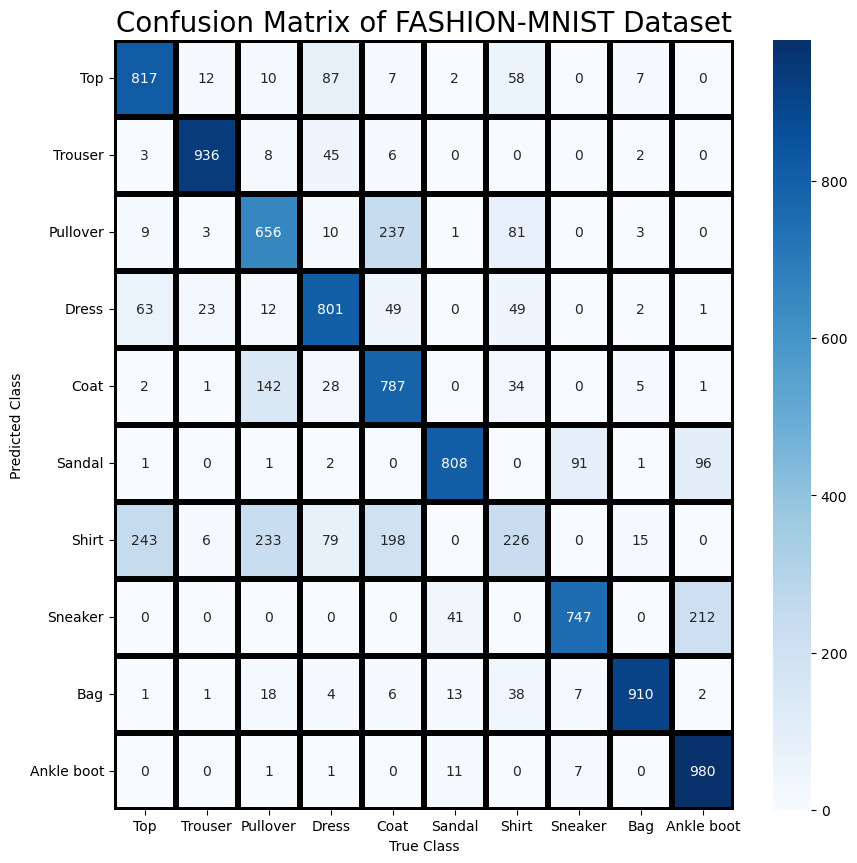

In [12]:
############################################################################################################################
# %%writefile confusion_matrix_plot.py
# Plot confusion matrix

import pickle
from keras.datasets import fashion_mnist
from sklearn import metrics
import numpy as np
import math
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained network
filename_model = 'neural_network.object'
network = pickle.load(open(filename_model, 'rb'))

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

def softmax(pre_activation_vector):
    post_act = np.copy(pre_activation_vector)
    max_exponent = np.max(post_act)
    post_act = np.exp(post_act - max_exponent)
    post_act = post_act / np.sum(post_act)
    return post_act

def relu(pre_activation_vector):
    post_act = np.copy(pre_activation_vector)
    post_act[post_act < 0] = 0
    return post_act

def sigmoid_element_wise(vector_component):
    if vector_component >= 0:
        return 1 / (1 + math.exp(-vector_component))
    else:
        return math.exp(vector_component) / (math.exp(vector_component) + 1)

def sigmoid(pre_activation_vector):
    activated_vector = np.empty_like(pre_activation_vector)
    for i, elem in np.ndenumerate(pre_activation_vector):
        activated_vector[i] = sigmoid_element_wise(elem)
    return activated_vector

def activation_function(pre_activation_vector, context):
    if context == 'softmax':
        return softmax(pre_activation_vector)
    elif context == 'sigmoid':
        return sigmoid(pre_activation_vector)
    elif context == 'tanh':
        return np.copy(np.tanh(pre_activation_vector))
    elif context == 'relu':
        return relu(pre_activation_vector)
    else:
        return None

def forward_propagation(n, x):
    for i in range(n):
        if i == 0:
            network[i]['a'] = network[i]['weight'] @ x + network[i]['bias']
        else:
            network[i]['a'] = network[i]['weight'] @ network[i - 1]['h'] + network[i]['bias']
        network[i]['h'] = activation_function(network[i]['a'], context=network[i]['context'])

cm_plot_labels = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_label(number_of_layer):
    acc = 0
    y_pred = []
    for x, y in zip(testX, testy):
        forward_propagation(number_of_layer, x.reshape(784, 1) / 255.0)
        max_prob = np.argmax(network[number_of_layer - 1]['h'])
        if max_prob == y:
            acc += 1
        y_pred.append(max_prob)
    print("Accuracy: ", str((acc / len(testy)) * 100), "%")
    cm = metrics.confusion_matrix(y_true=testy, y_pred=y_pred)
    df_cm = pd.DataFrame(cm, index=[i for i in cm_plot_labels], columns=[i for i in cm_plot_labels])
    print(df_cm)
    plt.figure(figsize=(10, 10))
    ax = sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='d', linewidths=3, linecolor='black')
    ax.set_yticklabels(cm_plot_labels, rotation=0)
    plt.xlabel("True Class")
    plt.ylabel("Predicted Class")
    plt.title('Confusion Matrix of FASHION-MNIST Dataset', fontsize=20)
    plt.show()

predict_label(len(network))


In [13]:
# # ############################################################################################################################
# # # %%writefile plot_images_fashion_mnist.py

from keras.datasets import fashion_mnist
import wandb

# Initialize Weights & Biases
wandb.init(project="Fashion-MNIST-Images", id="Question-1")

# Define class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion MNIST dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Normalize pixel values to the range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

def log_images():
    # Initialize lists to store images and their corresponding labels
    set_images = []
    set_labels = []
    count = 0  # Counter to keep track of how many images per class have been added
    for d in range(len(trainy)):
        if trainy[d] == count:
            # Add the image and its label to the respective lists
            set_images.append(trainX[d])
            set_labels.append(class_names[trainy[d]])
            count += 1
        else:
            pass
        if count == 10:
            break  # If images for all 10 classes have been collected, exit the loop

    # Log the images and their labels to Weights & Biases
    wandb.log({"Plot": [wandb.Image(img, caption=caption) for img, caption in zip(set_images, set_labels)]})

# Call the function to log images
log_images()


In [ ]:
# Define the sweep configuration

sweep_config = {
    
    "name": "my_custom_sweep",
    'method': 'grid',
    'parameters': {
        'epochs': {'values': [7, 10]},  # Add epochs parameter
        'num_layers': {'values': [3]},
#         'num_layers': {'values': [3, 4, 5]},
      
        'layer_1': {'values': [64, 128]},
        'layer_2': {'values': [64, 128]},
        'layer_3': {'values': [64, 128]},
#         'layer_4': {'values': [32, 64, 128]},
#         'layer_5': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0.0005, 0.5]},
        'learning_rate': {'values': [0.01, 0.001]},
#        'optimiser': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'optimiser': {'values': ['rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64, 128, 256, 512]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['relu']},
#         'activation': {'values': ['sigmoid', 'tanh', 'relu']},
        'loss_type':{'values': ['cross_entropy', 'squared_error']}
    }
}


metric = {
    'name': 'val_accuracy',
    'goal': 'maximize'   
    }

sweep_config['metric'] = metric


# Initialize a sweep
sweep_id = wandb.sweep(sweep_config, project="CS6910_ASSIGNMENT_01")

# Define the sweep function
# def sweep():
#     with wandb.init() as run:
#         config = run.config
#         train()

def sweep():
    train()

# Initialize the sweep agent

wandb.agent(sweep_id, function=sweep, count=50)



wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: alultgo3
Sweep URL: https://wandb.ai/abhijeet001/CS6910_ASSIGNMENT_01/sweeps/alultgo3


wandb: Agent Starting Run: gpkwfztd with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "C:\Users\OM\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "C:\Users\OM\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
        self.run()self.run()

  File "C:\Users\OM\anaconda3\lib\threading.py", line 917, in run
  File "C:\Users\OM\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)    
self._target(*self._args, **self._kwargs)  File "C:\Users\OM\anaconda3\lib\site-packages\wandb\sdk\wandb_run.py", line 268, in check_network_status

  Fil

epochs,▁▂▃▅▆▇█
train_accuracy,█▆█▁▆▁█
train_loss,▂▅▄▃▁█▆
val_accuracy,▁▄▁█▄█▁
val_loss,▂▁▇▃▃▇█
epochs,7
train_accuracy,0.1003
train_loss,2.30422
val_accuracy,0.09733
val_loss,2.30555


wandb: Agent Starting Run: k1viq9hc with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


epochs,▁▂▃▅▆▇█
train_accuracy,▂▅█▃▁▁▄
train_loss,▄█▂▁▅▇▂
val_accuracy,▆▅▁▆██▄
val_loss,▅█▃▃▁▂▂
epochs,7
train_accuracy,0.10029
train_loss,2.30359
val_accuracy,0.09733
val_loss,2.30408


wandb: Agent Starting Run: 94aynxxf with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


epochs,▁▂▃▅▆▇█
train_accuracy,▁▃▄█▄█▃
train_loss,▅▁█▄█▂▅
val_accuracy,██▆▁▆▁█
val_loss,▂▂▆█▅▁▄
epochs,7
train_accuracy,0.09982
train_loss,2.30442
val_accuracy,0.10267
val_loss,2.30413


wandb: Agent Starting Run: 1rqqilzh with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


epochs,▁▂▃▅▆▇█
train_accuracy,█▂█▆▁▅█
train_loss,▃▁█▃▄▃▄
val_accuracy,▂▇▂▁█▄▂
val_loss,▅▂█▄▁▃▂
epochs,7
train_accuracy,0.10099
train_loss,2.3045
val_accuracy,0.09417
val_loss,2.30348


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kp4klgdf with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


epochs,▁▂▃▅▆▇█
train_accuracy,▁▅▅▄█▇▇
train_loss,█▄▄▄▁▁▂
val_accuracy,▁▆▇▂█▆▇
val_loss,█▄▃▄▁▁▂
epochs,7
train_accuracy,0.666
train_loss,0.90728
val_accuracy,0.7235
val_loss,0.73118


wandb: Agent Starting Run: 677ql7e5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


epochs,▁▂▃▅▆▇█
train_accuracy,▁▃▇█▆▆█
train_loss,█▅▂▁▂▃▁
val_accuracy,▁▃█▇▅██
val_loss,█▄▁▁▃▂▂
epochs,7
train_accuracy,0.70506
train_loss,0.78061
val_accuracy,0.76317
val_loss,0.64046


wandb: Agent Starting Run: 8kgcaqo3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


epochs,▁▂▃▅▆▇█
train_accuracy,▃█▆▃▂▁▂
train_loss,▁▃▄█▄▇▁
val_accuracy,▆▁▄▅███
val_loss,▁▆▄█▁▅▁
epochs,7
train_accuracy,0.09937
train_loss,2.30355
val_accuracy,0.105
val_loss,2.30353


wandb: Agent Starting Run: na54cpcc with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


epochs,▁▂▃▅▆▇█
train_accuracy,▇▅▄█▄▃▁
train_loss,▂█▆▁▃▅▇
val_accuracy,█▄▅█▅▆▁
val_loss,▁█▆▁▃▄▇
epochs,7
train_accuracy,0.34066
train_loss,1.57574
val_accuracy,0.3515
val_loss,1.48681


wandb: Agent Starting Run: g1rx0v5v with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 7
wandb: 	layer_1: 64
wandb: 	layer_2: 64
wandb: 	layer_3: 64
wandb: 	learning_rate: 0.01
wandb: 	loss_type: cross_entropy
wandb: 	num_layers: 3
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
